In [1]:
import sys
sys.path.append("..")
from MPRA_predict.utils import *
from MPRA_predict.datasets import *
from MPRA_predict.metrics import *

In [2]:
MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_Sei_feature_0529_norm.csv')
MPRA_df

,seq,ID,chr,pos,ref_allele,alt_allele,allele,OL,data_project,K562,HepG2,SK-N-SH,A549,HCT116,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_H3K27me3,SK-N-SH_H3K4me1,SK-N-SH_H3K36me3,SK-N-SH_H3K9me3,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_H3K27me3,HCT116_H3K4me1,HCT116_H3K36me3,HCT116_H3K9me3,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_H3K27ac,A549_H3K27me3,A549_H3K4me1,A549_H3K36me3,A549_H3K9me3,A549_CTCF
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:A:wC,chr1,14677,G,A,alt,OL41_42,GTEx,0.014,-0.054,0.012,NaN,-0.719,1.390,2.062,1.980,1.975,1.896,1.928,1.882,1.568,1.227,1.828,1.575,2.338,1.326,2.126,NaN,1.335,1.136,1.808,1.173,2.097,NaN,1.748,NaN,1.230,0.887,1.954,1.554,1.663,1.130,2.058,NaN,1.344,1.077,2.016,1.678,NaN,1.378,NaN,2.238,1.398
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:R:wC,chr1,14677,G,A,ref,OL41_42,GTEx,-1.042,0.183,0.094,NaN,-0.250,1.411,2.094,1.990,2.005,1.902,1.947,1.916,1.545,1.233,1.853,1.580,2.326,1.287,2.111,NaN,1.302,1.203,1.905,1.257,2.096,NaN,1.731,NaN,1.225,0.892,1.990,1.585,1.758,1.171,2.085,NaN,1.316,1.081,2.076,1.723,NaN,1.399,NaN,2.277,1.375
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:A:wC,chr1,63697,T,C,alt,OL41_42,GTEx,-1.004,0.640,-0.188,NaN,0.685,0.425,0.468,0.103,0.818,0.243,0.401,-0.257,0.243,1.233,1.237,1.110,0.390,1.633,-0.085,NaN,0.645,-0.110,1.016,1.521,0.093,NaN,0.667,NaN,0.481,1.145,0.696,0.963,0.973,1.262,0.080,NaN,0.440,1.584,1.169,0.821,NaN,1.323,NaN,-0.209,0.514
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:R:wC,chr1,63697,T,C,ref,OL41_42,GTEx,-0.779,0.751,0.274,NaN,0.737,0.535,0.650,0.311,1.004,0.355,0.423,-0.260,0.293,1.239,1.420,1.261,0.485,1.719,-0.043,NaN,0.644,0.063,1.342,1.911,0.083,NaN,0.660,NaN,0.581,1.136,0.829,1.091,1.118,1.327,-0.002,NaN,0.463,1.607,1.408,1.054,NaN,1.488,NaN,-0.181,0.539
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,1:64764:C:T:R:wC,chr1,64764,C,T,ref,OL41_42,GTEx,-0.457,-0.645,0.061,NaN,-0.147,-0.905,-0.808,-0.649,-0.051,-0.960,-1.142,-1.254,-0.986,-0.986,-0.688,-0.744,-0.454,-0.600,-1.121,NaN,-1.136,-1.086,-0.706,-0.376,-0.965,NaN,-1.311,NaN,-1.033,-0.986,-0.944,-0.738,-0.269,-0.997,-1.182,NaN,-0.956,-1.133,-0.800,-0.735,NaN,-0.756,NaN,-1.374,-1.089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760674,CTGCATCTGTGCAGCCTGGCAGCGGCGGCGCTGCGCTGTGACATTT...,Y:15815629:NA:NA,chrY,15815629,NaN,NaN,NaN,OL15,OL15,0.708,1.294,1.077,NaN,NaN,2.340,2.772,2.077,2.699,2.173,2.724,2.559,1.704,2.190,2.655,1.838,2.159,1.572,2.181,NaN,1.503,3.214,3.521,2.520,2.442,NaN,1.579,NaN,2.171,2.152,3.157,2.291,3.047,1.898,2.714,NaN,1.411,2.389,3.121,2.806,NaN,2.094,NaN,2.726,1.675
760675,GCACTTCACATTTGTTTTTAGGGTTACATAGTCTACTCTGTATCCT...,Y:21740684:NA:NA,chrY,21740684,NaN,NaN,NaN,OL15,OL15,-0.708,-0.547,-0.429,NaN,NaN,-0.442,-0.692,-0.653,-0.289,-0.518,-0.454,-0.900,-0.701,-0.476,-0.811,-0.623,-0.503,-0.229,-0.569,NaN,-0.662,0.435,-0.592,-0.613,-0.740,NaN,-0.422,NaN,-0.401,-0.583,-0.885,-0.778,-0.403,-0.969,-0.667,NaN,-0.700,-0.395,-0.853,-0.732,NaN,-0.705,NaN,-0.555,-0.637
760676,TGTTCAAGTGGCCACAGGGTTACTTGCTTTAGCATGGCTCCTTGGC...,Y:21740884:NA:NA,chrY,21740884,NaN,NaN,NaN,OL15,OL15,-0.146,-0.200,-0.310,NaN,NaN,0.026,-0.156,0.190,0.085,0.238,0.346,-0.599,-0.131,0.557,0.220,0.750,-0.166,1.155,-0.130,NaN,0.258,0.585,0.190,1.309,-0.005,NaN,0.694,NaN,0.312,0.870,0.181,0.972,-0.029,1.078,-0.083,NaN,0.099,1.263,0.912,1.407,NaN,1.855,NaN,0.355,0.310
760677,TAATTAGTTGGGAAGGTTCAGGTTCTGGGACATCCGTTGCTATTTC...,Y:21741084:NA:NA,chrY,21741084,NaN,NaN,NaN,OL15,OL15,-0.119,-0.090,-0.387,NaN,NaN,0.131,-0.177,-0.151,

In [3]:
MPRA_df[f'seq'] = 'N'*200
MPRA_df

,seq,ID,chr,pos,ref_allele,alt_allele,allele,OL,data_project,K562,HepG2,SK-N-SH,A549,HCT116,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_H3K27me3,SK-N-SH_H3K4me1,SK-N-SH_H3K36me3,SK-N-SH_H3K9me3,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_H3K27me3,HCT116_H3K4me1,HCT116_H3K36me3,HCT116_H3K9me3,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_H3K27ac,A549_H3K27me3,A549_H3K4me1,A549_H3K36me3,A549_H3K9me3,A549_CTCF
0,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,1:14677:G:A:A:wC,chr1,14677,G,A,alt,OL41_42,GTEx,0.014,-0.054,0.012,NaN,-0.719,1.390,2.062,1.980,1.975,1.896,1.928,1.882,1.568,1.227,1.828,1.575,2.338,1.326,2.126,NaN,1.335,1.136,1.808,1.173,2.097,NaN,1.748,NaN,1.230,0.887,1.954,1.554,1.663,1.130,2.058,NaN,1.344,1.077,2.016,1.678,NaN,1.378,NaN,2.238,1.398
1,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,1:14677:G:A:R:wC,chr1,14677,G,A,ref,OL41_42,GTEx,-1.042,0.183,0.094,NaN,-0.250,1.411,2.094,1.990,2.005,1.902,1.947,1.916,1.545,1.233,1.853,1.580,2.326,1.287,2.111,NaN,1.302,1.203,1.905,1.257,2.096,NaN,1.731,NaN,1.225,0.892,1.990,1.585,1.758,1.171,2.085,NaN,1.316,1.081,2.076,1.723,NaN,1.399,NaN,2.277,1.375
2,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,1:63697:T:C:A:wC,chr1,63697,T,C,alt,OL41_42,GTEx,-1.004,0.640,-0.188,NaN,0.685,0.425,0.468,0.103,0.818,0.243,0.401,-0.257,0.243,1.233,1.237,1.110,0.390,1.633,-0.085,NaN,0.645,-0.110,1.016,1.521,0.093,NaN,0.667,NaN,0.481,1.145,0.696,0.963,0.973,1.262,0.080,NaN,0.440,1.584,1.169,0.821,NaN,1.323,NaN,-0.209,0.514
3,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,1:63697:T:C:R:wC,chr1,63697,T,C,ref,OL41_42,GTEx,-0.779,0.751,0.274,NaN,0.737,0.535,0.650,0.311,1.004,0.355,0.423,-0.260,0.293,1.239,1.420,1.261,0.485,1.719,-0.043,NaN,0.644,0.063,1.342,1.911,0.083,NaN,0.660,NaN,0.581,1.136,0.829,1.091,1.118,1.327,-0.002,NaN,0.463,1.607,1.408,1.054,NaN,1.488,NaN,-0.181,0.539
4,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,1:64764:C:T:R:wC,chr1,64764,C,T,ref,OL41_42,GTEx,-0.457,-0.645,0.061,NaN,-0.147,-0.905,-0.808,-0.649,-0.051,-0.960,-1.142,-1.254,-0.986,-0.986,-0.688,-0.744,-0.454,-0.600,-1.121,NaN,-1.136,-1.086,-0.706,-0.376,-0.965,NaN,-1.311,NaN,-1.033,-0.986,-0.944,-0.738,-0.269,-0.997,-1.182,NaN,-0.956,-1.133,-0.800,-0.735,NaN,-0.756,NaN,-1.374,-1.089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760674,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,Y:15815629:NA:NA,chrY,15815629,NaN,NaN,NaN,OL15,OL15,0.708,1.294,1.077,NaN,NaN,2.340,2.772,2.077,2.699,2.173,2.724,2.559,1.704,2.190,2.655,1.838,2.159,1.572,2.181,NaN,1.503,3.214,3.521,2.520,2.442,NaN,1.579,NaN,2.171,2.152,3.157,2.291,3.047,1.898,2.714,NaN,1.411,2.389,3.121,2.806,NaN,2.094,NaN,2.726,1.675
760675,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,Y:21740684:NA:NA,chrY,21740684,NaN,NaN,NaN,OL15,OL15,-0.708,-0.547,-0.429,NaN,NaN,-0.442,-0.692,-0.653,-0.289,-0.518,-0.454,-0.900,-0.701,-0.476,-0.811,-0.623,-0.503,-0.229,-0.569,NaN,-0.662,0.435,-0.592,-0.613,-0.740,NaN,-0.422,NaN,-0.401,-0.583,-0.885,-0.778,-0.403,-0.969,-0.667,NaN,-0.700,-0.395,-0.853,-0.732,NaN,-0.705,NaN,-0.555,-0.637
760676,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,Y:21740884:NA:NA,chrY,21740884,NaN,NaN,NaN,OL15,OL15,-0.146,-0.200,-0.310,NaN,NaN,0.026,-0.156,0.190,0.085,0.238,0.346,-0.599,-0.131,0.557,0.220,0.750,-0.166,1.155,-0.130,NaN,0.258,0.585,0.190,1.309,-0.005,NaN,0.694,NaN,0.312,0.870,0.181,0.972,-0.029,1.078,-0.083,NaN,0.099,1.263,0.912,1.407,NaN,1.855,NaN,0.355,0.310
760677,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,Y:21741084:NA:NA,chrY,21741084,NaN,NaN,NaN,OL15,OL15,-0.119,-0.090,-0.387,NaN,NaN,0.131,-0.177,-0.151,

In [4]:
MPRA_df.to_csv('../data/Gosai_MPRA/Gosai_MPRA_Sei_mask_seq_0601.csv', index=False)

In [ ]:
MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_Sei_feature_0529_norm.csv')
MPRA_df

In [ ]:
import itertools

cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

for k, mask_assay in enumerate(assays):
    for i, cell_type in enumerate(cell_types):
        for j, assay in enumerate(assays):
            if mask_assay == assay:
                MPRA_df[f'{cell_type}_mask_{mask_assay}_{assay}'] = 0
            else:
                MPRA_df[f'{cell_type}_mask_{mask_assay}_{assay}'] = MPRA_df[f'{cell_type}_{assay}']

for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        MPRA_df[f'{cell_type}_mask_all_assays_{assay}'] = 0

MPRA_df

In [ ]:
MPRA_df.to_csv('../data/Gosai_MPRA/Gosai_MPRA_Sei_mask_epi_0601.csv', index=False)

In [6]:
import subprocess

# subprocess.run(
#     ['python', 'train_scripts/test_0504.py', 
#      '-s', 'saved/0529_Gosai_MPRA_MyResTransformer3_seq_epi/0530_033808/', 
#      '-c', 'configs/config_0529_Gosai_MPRA_MyResTransformer_seq_epi_3_cell_types_mask_seq.yaml'],
#     cwd='..'
# )

# subprocess.run(
#     ['python', 'train_scripts/test_0504.py', 
#      '-s', 'saved/0529_Gosai_MPRA_MyResTransformer3_seq_epi/0530_033808/', 
#      '-c', 'configs/config_0529_Gosai_MPRA_MyResTransformer_seq_epi_3_cell_types_mask_epi.yaml'],
#     cwd='..'
# )

subprocess.run(
    ['python', 'train_scripts/test_0504.py', 
     '-s', 'saved/0612_Gosai_MPRA_MyResTransformer_seq_epi_3_cell_types/0611_230252/', 
     '-c', 'configs/config_0616_Gosai_MPRA_MyCNNTransformer_seq_epi_3_cell_types_mask_epi.yaml',
     '-o', 'Gosai_mask_epi_pred.npy'],
    cwd='..'
)

use new config: configs/config_0616_Gosai_MPRA_MyCNNTransformer_seq_epi_3_cell_types_mask_epi.yaml


100%|██████████| 186/186 [02:09<00:00,  1.44it/s]


CompletedProcess(args=['python', 'train_scripts/test_0504.py', '-s', 'saved/0612_Gosai_MPRA_MyResTransformer_seq_epi_3_cell_types/0611_230252/', '-c', 'configs/config_0616_Gosai_MPRA_MyCNNTransformer_seq_epi_3_cell_types_mask_epi.yaml', '-o', 'Gosai_mask_epi_pred.npy'], returncode=0)

In [7]:

subprocess.run(
    ['python', 'train_scripts/test_0504.py', 
     '-s', 'saved/0612_Gosai_MPRA_MyResTransformer_seq_epi_3_cell_types/0611_230252/', 
     '-c', 'configs/config_0616_Gosai_MPRA_MyCNNTransformer_seq_epi_3_cell_types_mask_seq.yaml',
     '-o', 'Gosai_mask_seq_pred.npy'],
    cwd='..'
)

use new config: configs/config_0616_Gosai_MPRA_MyCNNTransformer_seq_epi_3_cell_types_mask_seq.yaml


100%|██████████| 186/186 [01:10<00:00,  2.63it/s]


CompletedProcess(args=['python', 'train_scripts/test_0504.py', '-s', 'saved/0612_Gosai_MPRA_MyResTransformer_seq_epi_3_cell_types/0611_230252/', '-c', 'configs/config_0616_Gosai_MPRA_MyCNNTransformer_seq_epi_3_cell_types_mask_seq.yaml', '-o', 'Gosai_mask_seq_pred.npy'], returncode=0)

In [12]:
MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_Sei_feature_0529_norm.csv')
MPRA_df

,seq,ID,chr,pos,ref_allele,alt_allele,allele,OL,data_project,K562,HepG2,SK-N-SH,A549,HCT116,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_H3K27me3,SK-N-SH_H3K4me1,SK-N-SH_H3K36me3,SK-N-SH_H3K9me3,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_H3K27me3,HCT116_H3K4me1,HCT116_H3K36me3,HCT116_H3K9me3,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_H3K27ac,A549_H3K27me3,A549_H3K4me1,A549_H3K36me3,A549_H3K9me3,A549_CTCF
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:A:wC,chr1,14677,G,A,alt,OL41_42,GTEx,0.014,-0.054,0.012,NaN,-0.719,1.390,2.062,1.980,1.975,1.896,1.928,1.882,1.568,1.227,1.828,1.575,2.338,1.326,2.126,NaN,1.335,1.136,1.808,1.173,2.097,NaN,1.748,NaN,1.230,0.887,1.954,1.554,1.663,1.130,2.058,NaN,1.344,1.077,2.016,1.678,NaN,1.378,NaN,2.238,1.398
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:R:wC,chr1,14677,G,A,ref,OL41_42,GTEx,-1.042,0.183,0.094,NaN,-0.250,1.411,2.094,1.990,2.005,1.902,1.947,1.916,1.545,1.233,1.853,1.580,2.326,1.287,2.111,NaN,1.302,1.203,1.905,1.257,2.096,NaN,1.731,NaN,1.225,0.892,1.990,1.585,1.758,1.171,2.085,NaN,1.316,1.081,2.076,1.723,NaN,1.399,NaN,2.277,1.375
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:A:wC,chr1,63697,T,C,alt,OL41_42,GTEx,-1.004,0.640,-0.188,NaN,0.685,0.425,0.468,0.103,0.818,0.243,0.401,-0.257,0.243,1.233,1.237,1.110,0.390,1.633,-0.085,NaN,0.645,-0.110,1.016,1.521,0.093,NaN,0.667,NaN,0.481,1.145,0.696,0.963,0.973,1.262,0.080,NaN,0.440,1.584,1.169,0.821,NaN,1.323,NaN,-0.209,0.514
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:R:wC,chr1,63697,T,C,ref,OL41_42,GTEx,-0.779,0.751,0.274,NaN,0.737,0.535,0.650,0.311,1.004,0.355,0.423,-0.260,0.293,1.239,1.420,1.261,0.485,1.719,-0.043,NaN,0.644,0.063,1.342,1.911,0.083,NaN,0.660,NaN,0.581,1.136,0.829,1.091,1.118,1.327,-0.002,NaN,0.463,1.607,1.408,1.054,NaN,1.488,NaN,-0.181,0.539
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,1:64764:C:T:R:wC,chr1,64764,C,T,ref,OL41_42,GTEx,-0.457,-0.645,0.061,NaN,-0.147,-0.905,-0.808,-0.649,-0.051,-0.960,-1.142,-1.254,-0.986,-0.986,-0.688,-0.744,-0.454,-0.600,-1.121,NaN,-1.136,-1.086,-0.706,-0.376,-0.965,NaN,-1.311,NaN,-1.033,-0.986,-0.944,-0.738,-0.269,-0.997,-1.182,NaN,-0.956,-1.133,-0.800,-0.735,NaN,-0.756,NaN,-1.374,-1.089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760674,CTGCATCTGTGCAGCCTGGCAGCGGCGGCGCTGCGCTGTGACATTT...,Y:15815629:NA:NA,chrY,15815629,NaN,NaN,NaN,OL15,OL15,0.708,1.294,1.077,NaN,NaN,2.340,2.772,2.077,2.699,2.173,2.724,2.559,1.704,2.190,2.655,1.838,2.159,1.572,2.181,NaN,1.503,3.214,3.521,2.520,2.442,NaN,1.579,NaN,2.171,2.152,3.157,2.291,3.047,1.898,2.714,NaN,1.411,2.389,3.121,2.806,NaN,2.094,NaN,2.726,1.675
760675,GCACTTCACATTTGTTTTTAGGGTTACATAGTCTACTCTGTATCCT...,Y:21740684:NA:NA,chrY,21740684,NaN,NaN,NaN,OL15,OL15,-0.708,-0.547,-0.429,NaN,NaN,-0.442,-0.692,-0.653,-0.289,-0.518,-0.454,-0.900,-0.701,-0.476,-0.811,-0.623,-0.503,-0.229,-0.569,NaN,-0.662,0.435,-0.592,-0.613,-0.740,NaN,-0.422,NaN,-0.401,-0.583,-0.885,-0.778,-0.403,-0.969,-0.667,NaN,-0.700,-0.395,-0.853,-0.732,NaN,-0.705,NaN,-0.555,-0.637
760676,TGTTCAAGTGGCCACAGGGTTACTTGCTTTAGCATGGCTCCTTGGC...,Y:21740884:NA:NA,chrY,21740884,NaN,NaN,NaN,OL15,OL15,-0.146,-0.200,-0.310,NaN,NaN,0.026,-0.156,0.190,0.085,0.238,0.346,-0.599,-0.131,0.557,0.220,0.750,-0.166,1.155,-0.130,NaN,0.258,0.585,0.190,1.309,-0.005,NaN,0.694,NaN,0.312,0.870,0.181,0.972,-0.029,1.078,-0.083,NaN,0.099,1.263,0.912,1.407,NaN,1.855,NaN,0.355,0.310
760677,TAATTAGTTGGGAAGGTTCAGGTTCTGGGACATCCGTTGCTATTTC...,Y:21741084:NA:NA,chrY,21741084,NaN,NaN,NaN,OL15,OL15,-0.119,-0.090,-0.387,NaN,NaN,0.131,-0.177,-0.151,

In [13]:
cell_types = [
  'K562_mask_DNase',
  'K562_mask_H3K4me3',
  'K562_mask_H3K27ac',
  'K562_mask_CTCF',
  'HepG2_mask_DNase',
  'HepG2_mask_H3K4me3',
  'HepG2_mask_H3K27ac',
  'HepG2_mask_CTCF',
  'SK-N-SH_mask_DNase',
  'SK-N-SH_mask_H3K4me3',
  'SK-N-SH_mask_H3K27ac',
  'SK-N-SH_mask_CTCF',
  'HCT116_mask_DNase',
  'HCT116_mask_H3K4me3',
  'HCT116_mask_H3K27ac',
  'HCT116_mask_CTCF',
  'A549_mask_DNase',
  'A549_mask_H3K4me3',
  'A549_mask_H3K27ac',
  'A549_mask_CTCF',
  'K562_mask_all_assays',
  'HepG2_mask_all_assays',
  'SK-N-SH_mask_all_assays',
  'HCT116_mask_all_assays',
  'A549_mask_all_assays',]
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

# y_pred = np.load(f'../saved/0529_Gosai_MPRA_MyResTransformer3_seq_epi/0530_033808/mask_epi_pred.npy')
y_pred = np.load(f'../saved/0612_Gosai_MPRA_MyResTransformer_seq_epi_3_cell_types/0611_230252/Gosai_mask_epi_pred.npy')

cell_types_pred = [f'{cell_type}_pred' for cell_type in cell_types]
MPRA_df[cell_types_pred] = y_pred

In [14]:
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

y_pred = np.load(f'../saved/0612_Gosai_MPRA_MyResTransformer_seq_epi_3_cell_types/0611_230252/Gosai_mask_seq_pred.npy')
cell_types_pred = [f'{cell_type}_mask_seq_pred' for cell_type in cell_types]
MPRA_df[cell_types_pred] = y_pred

In [18]:
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

y_pred = np.load(f'../saved/0612_Gosai_MPRA_MyResTransformer_seq_epi_3_cell_types/0611_230252/Gosai_MPRA_pred.npy')
cell_types_pred = [f'{cell_type}_original_pred' for cell_type in cell_types]
MPRA_df[cell_types_pred] = y_pred

In [16]:
MPRA_df

,seq,ID,chr,pos,ref_allele,alt_allele,allele,OL,data_project,K562,HepG2,SK-N-SH,A549,HCT116,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_H3K27me3,SK-N-SH_H3K4me1,SK-N-SH_H3K36me3,SK-N-SH_H3K9me3,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_H3K27me3,HCT116_H3K4me1,HCT116_H3K36me3,HCT116_H3K9me3,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_H3K27ac,A549_H3K27me3,A549_H3K4me1,A549_H3K36me3,A549_H3K9me3,A549_CTCF,K562_mask_DNase_pred,K562_mask_H3K4me3_pred,K562_mask_H3K27ac_pred,K562_mask_CTCF_pred,HepG2_mask_DNase_pred,HepG2_mask_H3K4me3_pred,HepG2_mask_H3K27ac_pred,HepG2_mask_CTCF_pred,SK-N-SH_mask_DNase_pred,SK-N-SH_mask_H3K4me3_pred,SK-N-SH_mask_H3K27ac_pred,SK-N-SH_mask_CTCF_pred,HCT116_mask_DNase_pred,HCT116_mask_H3K4me3_pred,HCT116_mask_H3K27ac_pred,HCT116_mask_CTCF_pred,A549_mask_DNase_pred,A549_mask_H3K4me3_pred,A549_mask_H3K27ac_pred,A549_mask_CTCF_pred,K562_mask_all_assays_pred,HepG2_mask_all_assays_pred,SK-N-SH_mask_all_assays_pred,HCT116_mask_all_assays_pred,A549_mask_all_assays_pred,K562_mask_seq_pred,HepG2_mask_seq_pred,SK-N-SH_mask_seq_pred,HCT116_mask_seq_pred,A549_mask_seq_pred,K562_pred,HepG2_pred,SK-N-SH_pred,HCT116_pred,A549_pred
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:A:wC,chr1,14677,G,A,alt,OL41_42,GTEx,0.014,-0.054,0.012,NaN,-0.719,1.390,2.062,1.980,1.975,1.896,1.928,1.882,1.568,1.227,1.828,1.575,2.338,1.326,2.126,NaN,1.335,1.136,1.808,1.173,2.097,NaN,1.748,NaN,1.230,0.887,1.954,1.554,1.663,1.130,2.058,NaN,1.344,1.077,2.016,1.678,NaN,1.378,NaN,2.238,1.398,-0.235,-0.121,-0.392,-0.105,-0.289,-0.151,-0.384,-0.125,-0.335,-0.173,-0.386,-0.144,-0.287,-0.154,-0.397,-0.142,-0.270,-0.144,-0.396,-0.125,-0.320,-0.320,-0.320,-0.320,-0.320,-0.843,-0.899,-0.300,-0.936,-1.003,-0.150,-0.184,-0.274,-0.259,-0.227
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:R:wC,chr1,14677,G,A,ref,OL41_42,GTEx,-1.042,0.183,0.094,NaN,-0.250,1.411,2.094,1.990,2.005,1.902,1.947,1.916,1.545,1.233,1.853,1.580,2.326,1.287,2.111,NaN,1.302,1.203,1.905,1.257,2.096,NaN,1.731,NaN,1.225,0.892,1.990,1.585,1.758,1.171,2.085,NaN,1.316,1.081,2.076,1.723,NaN,1.399,NaN,2.277,1.375,-0.115,0.008,-0.257,0.032,-0.176,-0.032,-0.252,0.007,-0.208,-0.052,-0.257,0.003,-0.170,-0.033,-0.270,-0.017,-0.148,-0.020,-0.269,0.009,-0.248,-0.248,-0.248,-0.248,-0.248,-0.809,-0.849,-0.268,-0.881,-0.920,-0.113,-0.142,-0.148,-0.222,-0.191
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:A:wC,chr1,63697,T,C,alt,OL41_42,GTEx,-1.004,0.640,-0.188,NaN,0.685,0.425,0.468,0.103,0.818,0.243,0.401,-0.257,0.243,1.233,1.237,1.110,0.390,1.633,-0.085,NaN,0.645,-0.110,1.016,1.521,0.093,NaN,0.667,NaN,0.481,1.145,0.696,0.963,0.973,1.262,0.080,NaN,0.440,1.584,1.169,0.821,NaN,1.323,NaN,-0.209,0.514,-0.727,-0.817,-0.810,-0.911,-0.487,-0.520,-0.489,-1.227,-0.508,-0.528,-0.550,-0.507,-0.561,-0.543,-0.555,-1.122,-0.501,-0.576,-0.460,-1.122,-0.889,-0.889,-0.889,-0.889,-0.889,-0.459,0.000,-0.588,0.330,-0.106,-0.938,-1.096,-0.498,-0.817,-0.843
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:R:wC,chr1,63697,T,C,ref,OL41_42,GTEx,-0.779,0.751,0.274,NaN,0.737,0.535,0.650,0.311,1.004,0.355,0.423,-0.260,0.293,1.239,1.420,1.261,0.485,1.719,-0.043,NaN,0.644,0.063,1.342,1.911,0.083,NaN,0.660,NaN,0.581,1.136,0.829,1.091,1.118,1.327,-0.002,NaN,0.463,1.607,1.408,1.054,NaN,1.488,NaN,-0.181,0.539,-0.586,-0.639,-0.539,-0.852,-0.348,-0.397,-0.367,-1.111,-0.352,-0.393,-0.433,-0.366,-0.443,-0.419,-0.419,-1.028,-0.347,-0.441,-0.322,-1.049,-0.826,-0.826,-0.826,-0.826,-0.826,-0.427,-0.064,-0.439,0.322,-0.160,-0.925,-1.039,-0.357,-0.769,-0.810
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,1:64764:C:T:R:wC,chr1,64764,C,T,ref,OL41_42,GTEx,-0.457,-0.645,0.061,NaN,-0.147,-0.905,-0.808,-0.649,-0.051,-0.960,-1.142,-1.254,-0.986,

In [26]:
data_split_dict = {}
data_split_dict['total'] = np.ones(len(MPRA_df), dtype=bool)

data_split_dict['chrom'] = MPRA_df['chr'].isin([f'chr{i}' for i in (list(range(1, 23)) + ['X', 'Y'])])
data_split_dict['designed'] = ~data_split_dict['chrom']

data_split_dict['train'] = MPRA_df['chr'].isin([f'chr{i}' for i in (list(range(3, 23)) + ['X', 'Y'])])
data_split_dict['valid'] = MPRA_df['chr'].isin(['chr1'])
data_split_dict['test'] = MPRA_df['chr'].isin(['chr2'])

data_split_dict['ref'] = (MPRA_df['allele'] == 'ref') | (MPRA_df['allele'].isna())
data_split_dict['alt'] = MPRA_df['allele'] == 'alt'


# 计算每条序列在不同细胞类型中的最大值和最小值之差
MPRA_df['range'] = MPRA_df[cell_types].max(axis=1, skipna=True) - MPRA_df[cell_types].min(axis=1, skipna=True)
# 计算 range 的第95百分位
threshold = np.percentile(MPRA_df['range'].dropna(), 95)
# 前5%的高差值序列为 diff，其余为 const
data_split_dict['diff'] = MPRA_df['range'] > threshold
data_split_dict['const'] = ~data_split_dict['diff']



values = MPRA_df[cell_types].values
values_no_nan = np.where(np.isnan(values), -np.inf, values)
sorted_values = np.sort(values_no_nan, axis=1)
MPRA_df['MinGap'] = sorted_values[:, -1] - sorted_values[:, -2]
threshold = np.percentile(MPRA_df['MinGap'].dropna(), 95)
data_split_dict['MinGap_top5'] = MPRA_df['MinGap'] > threshold


for key in data_split_dict:
    print(key, data_split_dict[key].sum())

keys = list(data_split_dict.keys())
for k1 in keys:
    for k2 in keys:
        data_split_dict[f'{k1}+{k2}'] = data_split_dict[k1] & data_split_dict[k2]

total 760679
chrom 760679
designed 0
train 631073
valid 70952
test 58654
ref 389266
alt 371413
diff 38034
const 722645
MinGap_top5 38034


In [30]:
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']

pearson_df = pd.DataFrame(dtype=float)
for i, cell_type in enumerate(cell_types):
    for variant in ['original', 'mask_CTCF', 'mask_DNase', 'mask_H3K4me3', 'mask_H3K27ac', 'mask_all_assays', 'mask_seq']:
        df = MPRA_df[data_split_dict['test+diff']]
        x = df[f'{cell_type}_{variant}_pred']
        y = df[f'{cell_type}']
        r, _ = pearson(x, y)
        pearson_df.loc[f'{variant}_pred', f'{cell_type}'] = r

print(pearson_df)

                      K562  HepG2  SK-N-SH  HCT116  A549
original_pred        0.764  0.718    0.711   0.699 0.670
mask_CTCF_pred       0.743  0.695    0.679   0.695 0.644
mask_DNase_pred      0.558  0.579    0.723   0.640 0.704
mask_H3K4me3_pred    0.567  0.588    0.713   0.663 0.693
mask_H3K27ac_pred    0.515  0.567    0.684   0.603 0.641
mask_all_assays_pred 0.579  0.526    0.570   0.624 0.607
mask_seq_pred        0.506  0.472    0.328   0.415 0.351


In [33]:
# x = np.arange(7)
# x_labels = ['original', 'mask\nCTCF', 'mask\nDNase', 'mask\nH3K4me3', 'mask\nH3K27ac', 'mask\nall assays', 'mask\nseq']
# means = pearson_df.mean(axis=1)
# stds = pearson_df.std(axis=1)

# fig, ax = plt.subplots(figsize=(10, 6))

# for i in range(7):
#     ax.bar(
#         x[i], means[i], yerr=stds[i], width=0.65,
#         capsize=4, edgecolor='black', linewidth=1, color=tab20_colors[2*i+1]
#     )

# plt.xticks(x, x_labels)
# plt.ylim(0,1)
# plt.xlabel('Model ablation variant')
# plt.ylabel('Peasron correlation')

# plt.savefig('figures/Gosai_MPRA_ablation_correlation_bar.png', dpi=400, bbox_inches='tight')  # 保存时也包含图例
# plt.show()

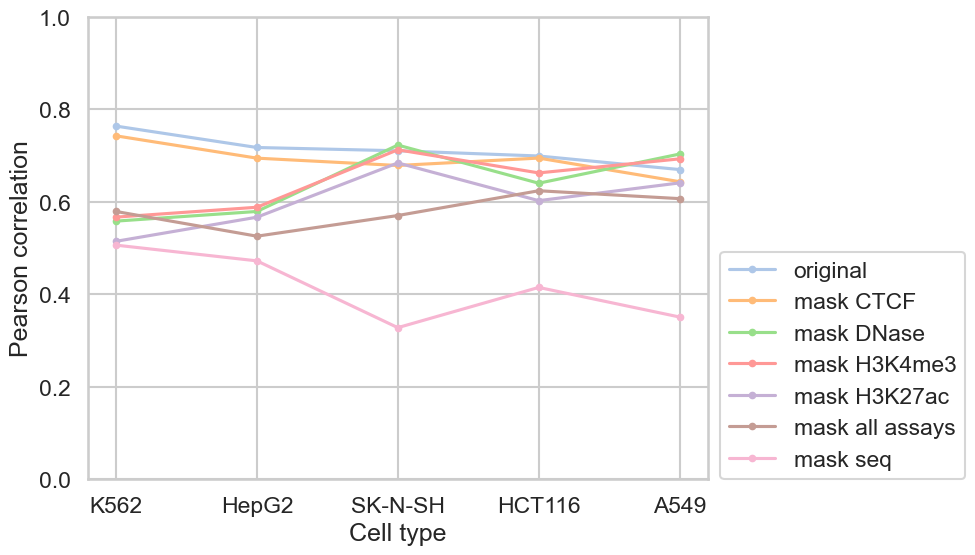

In [41]:
sns.set_theme(context='talk', style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

labels = ['original', 'mask CTCF', 'mask DNase', 'mask H3K4me3', 'mask H3K27ac', 'mask all assays', 'mask seq']

for i, index in enumerate(pearson_df.index):
    plt.plot(pearson_df.columns, pearson_df.loc[index], marker='.', label=labels[i], color=tab20_colors[i*2+1])

plt.xlabel('Cell type')
plt.ylabel('Pearson correlation')
plt.ylim(0, 1)

# 将图例放在图外（右侧）
plt.legend(bbox_to_anchor=(1.02, 0.0), loc='lower left', borderaxespad=0.)

plt.savefig('figures/Gosai_MPRA_mask_seq_epi.png', dpi=400, bbox_inches='tight')  # 保存时也包含图例
plt.show()

In [135]:
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']


ablations = ['original', 'mask_DNase', 'mask_H3K4me3', 'mask_H3K27ac', 'mask_CTCF', 'mask_all_assays', 'mask_seq']


for i, cell_type in enumerate(cell_types):
    pearson_df = pd.DataFrame(dtype=float)
    for ablation in ablations:
        for assay in assays:

            df = MPRA_df

            x = df[f'{cell_type}_{ablation}_pred']
            y = df[f'{cell_type}_{assay}']
            r, _ = pearson(x, y)
            pearson_df.loc[f'{cell_type}_{ablation}_pred', f'{cell_type}_{assay}'] = r

    print(pearson_df)

                           K562_DNase  K562_H3K4me3  K562_H3K27ac  K562_CTCF
K562_original_pred              0.581         0.548         0.550      0.435
K562_mask_DNase_pred            0.205         0.201         0.238      0.078
K562_mask_H3K4me3_pred          0.401         0.378         0.417      0.241
K562_mask_H3K27ac_pred          0.160         0.125         0.155      0.033
K562_mask_CTCF_pred             0.522         0.502         0.530      0.380
K562_mask_all_assays_pred       0.057         0.031         0.055     -0.028
K562_mask_seq_pred              0.819         0.870         0.934      0.609
                            HepG2_DNase  HepG2_H3K4me3  HepG2_H3K27ac  HepG2_CTCF
HepG2_original_pred               0.481          0.514          0.448       0.384
HepG2_mask_DNase_pred             0.166          0.215          0.174       0.044
HepG2_mask_H3K4me3_pred           0.359          0.390          0.358       0.220
HepG2_mask_H3K27ac_pred           0.090          0.112  